## Wine Quality Prediction

File Reader to 'Rule Engine Node' to turn the 10 point scale to dichtome variable (good wine and rest), the code to put in the rule engine is something like this:

$quality$ > 6.5 => "good"

TRUE => "bad"

- Rule Engine Node output to input of Column Filter node to filter out your original 10point feature (this prevent leaking)

- Column Filter Node output to input of Partitioning Node (your standard train/tes split, e.g. 75%/25%, choose 'random' or 'stratified')

- Partitioning Node train data split output to input of Train data split to input Decision Tree Learner node and

- Partitioning Node test data split output to input Decision Tree predictor Node

- Decision Tree learner Node output to input Decision Tree Node input

- Decision Tree output to input ROC Node.. (here you can evaluate your model base on AUC value)

In [75]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [76]:
df = pd.read_csv('winequality-red.csv')
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [77]:
# Check if any Null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [78]:
X = df.drop(['quality'],axis=1)
y = df.iloc[:,-1]

In [79]:
# Split the data

from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test= train_test_split(X,y,test_size = 0.25,random_state = 123)

In [80]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
y_pred_dt= dt.fit(X_train,y_train).predict(X_test)

In [81]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_dt)

0.5675

In [82]:
def histPlot(col):
    sns.histplot(x=col, data=df)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

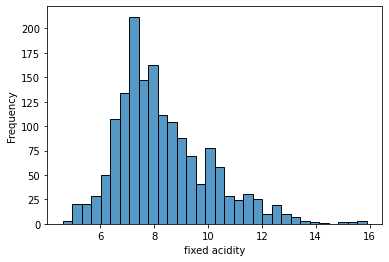

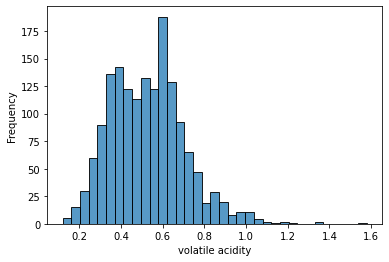

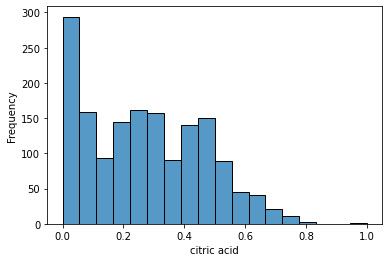

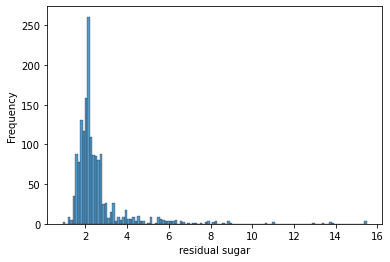

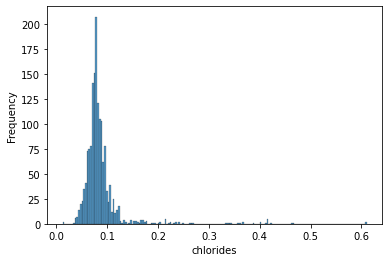

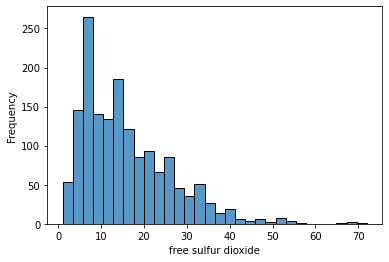

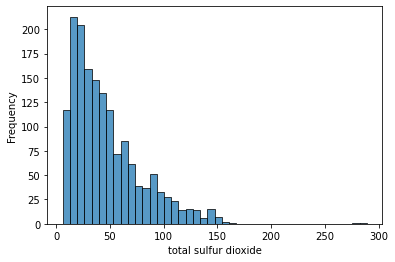

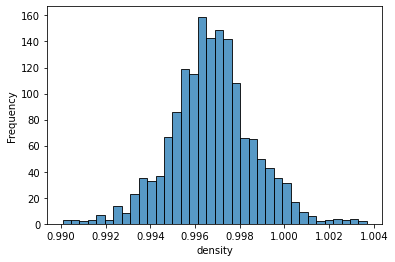

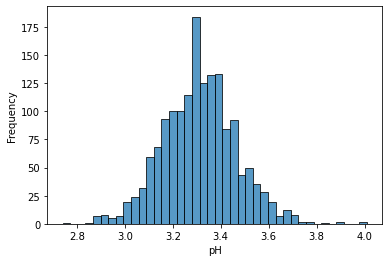

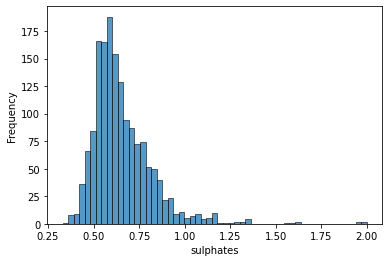

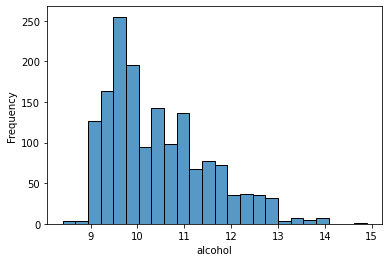

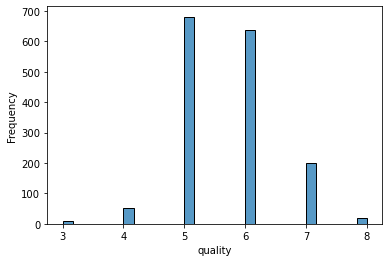

In [83]:
for col in df.columns:
    histPlot(col)

<AxesSubplot:ylabel='quality'>

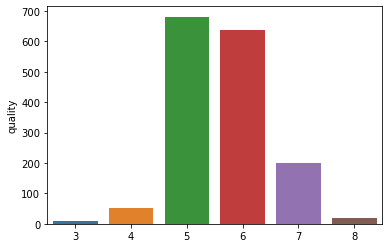

In [84]:
xquality=df['quality'].value_counts()
sns.barplot(y=xquality, x=xquality.index)

In [85]:
from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('accuracy score of KNN :{}'.format(acc))

accuracy score of KNN :0.49
